# Q1. Which bird species are the most commonly observed overall?

In [1]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np

In [ ]:
df = pd.read_csv("<PATH>/0035785-251025141854904.csv",
sep="\t",
skiprows=1,
names=[
    "species","specieskey","year","month","countrycode","occurences"
])

In [3]:
df.isna().sum()

species        0
specieskey     0
year           0
month          0
countrycode    0
occurences     0
dtype: int64

In [4]:
df.shape

(61269, 6)

In [5]:
df.head()

,species,specieskey,year,month,countrycode,occurences
0,Phasianus colchicus,9752149,2024,5,DE,1770
1,Cyanistes caeruleus,2487879,2018,8,FR,406
2,Phylloscopus collybita,2493091,2020,8,DE,617
3,Merops apiaster,2475443,2024,6,DE,145
4,Garrulus glandarius,5229493,2023,9,DE,1830


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61269 entries, 0 to 61268
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   species      61269 non-null  object
 1   specieskey   61269 non-null  int64 
 2   year         61269 non-null  int64 
 3   month        61269 non-null  int64 
 4   countrycode  61269 non-null  object
 5   occurences   61269 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.8+ MB


In [7]:
species_cnt = (df.groupby('species',as_index=False)['occurences'].sum().sort_values('occurences', ascending=False))

In [8]:
n=10
species_cnt.head(n)

,species,occurences
621,Turdus merula,355756
193,Columba palumbus,349947
427,Parus major,344213
198,Corvus corone,336839
208,Cyanistes caeruleus,301484
267,Fringilla coelebs,272834
244,Erithacus rubecula,261561
40,Anas platyrhynchos,243753
470,Pica pica,217975
570,Sturnus vulgaris,217726


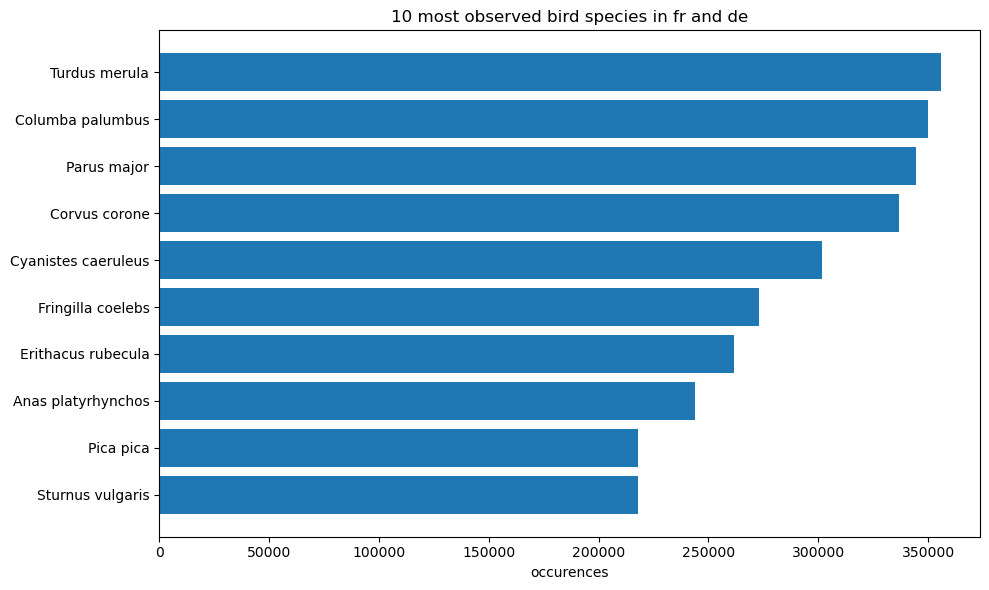

In [9]:
mpl.figure(figsize=(10,6))
top=species_cnt.head(n)
mpl.barh(top['species'][::-1],top['occurences'][::-1])
mpl.xlabel('occurences')
mpl.title('10 most observed bird species in fr and de')
mpl.tight_layout()